In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import shap
from shap.plots import waterfall, beeswarm
from shap import Explanation, KernelExplainer
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score
# from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# from imblearn.over_sampling import SMOTE

In [56]:

feature_types = {
    "project_feature": ["num_commits", "project_age_days", "num_issues", "num_pull", 
                        "num_stargazers", "num_watchers", "num_forks", "num_subscribers", 
                        "num_contributors", "project_size(kB)"],
    "security_practice": ["ssf0_Binary-Artifacts", "ssf1_Branch-Protection",
                          "ssf3_CII-Best-Practices", "ssf7_Dependency-Update-Tool",
                          "ssf8_Fuzzing", "ssf9_License", "ssf10_Maintained", "ssf13_SAST",
                          "ssf17_Vulnerabilities"],
    "project_quality": ['num_sonarQube_BUG_HIGH', 'num_sonarQube_BUG_MEDIUM', 'num_sonarQube_BUG_LOW', 'num_sonarQube_BUG_BLOCKER',
            'num_sonarQube_VULNERABILITY_HIGH', 'num_sonarQube_VULNERABILITY_MEDIUM', 'num_sonarQube_VULNERABILITY_LOW',
            'num_sonarQube_VULNERABILITY_BLOCKER', 'num_sonarQube_CODE_SMELL_HIGH', 'num_sonarQube_CODE_SMELL_MEDIUM',
            'num_sonarQube_CODE_SMELL_LOW', 'num_sonarQube_CODE_SMELL_BLOCKER'],
}

# Define features and target
# เปลี่ยนฟีเจ้อจรงนี้้ 👇👇👇👇
feature = "project_feature"
# เปลี่ยนcategoryจรงนี้้ 👇👇👇👇
cate = "Generic policy"

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = pd.read_csv(f"auto/{cate}_{feature}_X_train.csv")
X_test = pd.read_csv(f"auto/{cate}_{feature}_X_test.csv")
y_train = pd.read_csv(f"auto/{cate}_{feature}_y_train.csv")
y_test = pd.read_csv(f"auto/{cate}_{feature}_y_test.csv")
        
# Train the RandomForestClassifier with given parameters
### Generic policy ###
if feature == "project_feature" and cate == "Generic policy":
    model = RandomForestClassifier(
        max_features=1, min_samples_leaf=6, min_samples_split=7,
        n_estimators=512, n_jobs=1, random_state=1, warm_start=True
    )
elif feature == "security_practice" and cate == "Generic policy":
    model = RandomForestClassifier(
        bootstrap=False, max_features=1, min_samples_leaf=3,
        min_samples_split=14, n_estimators=512, n_jobs=1,
        random_state=1, warm_start=True
    )
elif feature == "project_quality" and cate == "Generic policy":
    model = AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.010381491760996881, n_estimators=362,
                   random_state=1)
### Reporting mechanism ###
elif feature == "project_feature" and cate == "Reporting mechanism":
    model = ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=1,
                     min_samples_split=7, n_estimators=512, n_jobs=1,
                     random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "Reporting mechanism":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=8.908183652101429e-05,
                               learning_rate=0.19911994270380215,
                               max_iter=512, max_leaf_nodes=955,
                               min_samples_leaf=33, n_iter_no_change=2,
                               random_state=1, validation_fraction=None,
                               warm_start=True)
elif feature == "project_quality" and cate == "Reporting mechanism":
    model = KNeighborsClassifier(n_neighbors=2, p=1, weights='distance') ####🥶🥶🥶🥶🥶
### Scope of practice ###
elif feature == "project_feature" and cate == "Scope of practice":
    model = RandomForestClassifier(max_features=15, min_samples_leaf=5,
                       min_samples_split=20, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "Scope of practice":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=9),
                   learning_rate=1.9701455892241493, n_estimators=101,
                   random_state=1)
elif feature == "project_quality" and cate == "Scope of practice":
    model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=4,
                       min_samples_leaf=7, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)
### User guideline ###
elif feature == "project_feature" and cate == "User guideline":
    model = ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=512,
                     n_jobs=1, random_state=1, warm_start=True)
elif feature == "security_practice" and cate == "User guideline":
    model = HistGradientBoostingClassifier(early_stopping=True,
                               l2_regularization=0.1144885415414585,
                               learning_rate=0.35651231429733377, 
                               max_iter=128, max_leaf_nodes=570,
                               min_samples_leaf=52, n_iter_no_change=20,
                               random_state=1,
                               validation_fraction=0.26745137407982933,
                               warm_start=True)
elif feature == "project_quality" and cate == "User guideline":
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.16884660398877008, n_estimators=144,
                   random_state=1)
else:
    raise ValueError("Invalid feature or category selection.")

print(model)

model.fit(X_train, y_train)

# AUC
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]
# Predict the classes for the test set
y_pred = model.predict(X_test)

# Calculate the AUC - ROC score
roc_auc = roc_auc_score(y_test, y_probs) 

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)

#calculate R-squared
r2 = r2_score(y_test, y_probs)

print(f"AUC - ROC Score: {roc_auc:.2f}")

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_pred, y_test)
print(f"Accuracy: {accuracy}")
print(f"R-squared (R²): {r2:.2f}")
print("Classification report:")
print(report)

RandomForestClassifier(max_features=1, min_samples_leaf=6, min_samples_split=7,
                       n_estimators=512, n_jobs=1, random_state=1,
                       warm_start=True)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



AUC - ROC Score: 0.69
Accuracy: 0.6147540983606558
R-squared (R²): 0.07
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        64
           1       0.58      0.69      0.63        58

    accuracy                           0.61       122
   macro avg       0.62      0.62      0.61       122
weighted avg       0.62      0.61      0.61       122



how to read graph: https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/

tree explainer: https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b

shap index 0 or 1: https://github.com/shap/shap/issues/1252

readability shap: https://medium.com/towards-data-science/how-to-easily-customize-shap-plots-in-python-fdff9c0483f2

TreeExplainer (Optimized for Trees)

In [57]:
# 1. TreeExplainer (Optimized for Trees)
# tree_explainer = shap.TreeExplainer(model, X_test)
# shap_values_tree = tree_explainer(X_test)

explainer = shap.TreeExplainer(model)
shap_values_tree = explainer.shap_values(X_test)


In [58]:
print(shap_values_tree)

[[[-0.01514315  0.01514315]
  [ 0.04133347 -0.04133347]
  [ 0.04015722 -0.04015722]
  [ 0.03565999 -0.03565999]
  [ 0.01740918 -0.01740918]]

 [[ 0.03514498 -0.03514498]
  [-0.01268706  0.01268706]
  [-0.02245371  0.02245371]
  [-0.05206371  0.05206371]
  [ 0.0032134  -0.0032134 ]]

 [[-0.00386683  0.00386683]
  [-0.01981742  0.01981742]
  [-0.01885185  0.01885185]
  [-0.02926335  0.02926335]
  [ 0.02585013 -0.02585013]]

 ...

 [[-0.00755786  0.00755786]
  [-0.11902365  0.11902365]
  [-0.08599987  0.08599987]
  [-0.05282063  0.05282063]
  [-0.10258855  0.10258855]]

 [[ 0.00384484 -0.00384484]
  [-0.01534307  0.01534307]
  [ 0.00595133 -0.00595133]
  [ 0.05157732 -0.05157732]
  [-0.0311374   0.0311374 ]]

 [[ 0.00652536 -0.00652536]
  [-0.04216018  0.04216018]
  [-0.03236485  0.03236485]
  [ 0.03327486 -0.03327486]
  [-0.01889146  0.01889146]]]


In [59]:
import os
import pandas as pd
import numpy as np
import json

# Define directory and file path
directory = "raw_shap"  # Remove leading "/"
file_path = f"{directory}/{cate}_{feature}_shap.csv"

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Convert SHAP values to a 2D format
num_samples, num_features, num_classes = shap_values_tree.shape  # Get dimensions
reshaped_values = shap_values_tree.reshape(num_samples, num_features * num_classes)

# Create column names dynamically
columns = [f"Feature_{i}_Class_{j}" for i in range(num_features) for j in range(num_classes)]

# Convert to DataFrame
df = pd.DataFrame(reshaped_values, columns=columns)

# Save to CSV
df.to_csv(file_path, index=False)

print(f"SHAP values saved as CSV at {file_path}")

########## json ################

# Convert SHAP values to list
shap_values_list = shap_values_tree.tolist()

# Define directory and file path
directory = "raw_shap"  # Remove leading "/"
file_path = f"{directory}/{cate}_{feature}_shap.json"  # JSON extension

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

# Save to JSON
with open(file_path, "w") as f:
    json.dump(shap_values_list, f)

print(f"SHAP values saved at {file_path}")

SHAP values saved as CSV at raw_shap/Generic policy_project_feature_shap.csv
SHAP values saved at raw_shap/Generic policy_project_feature_shap.json


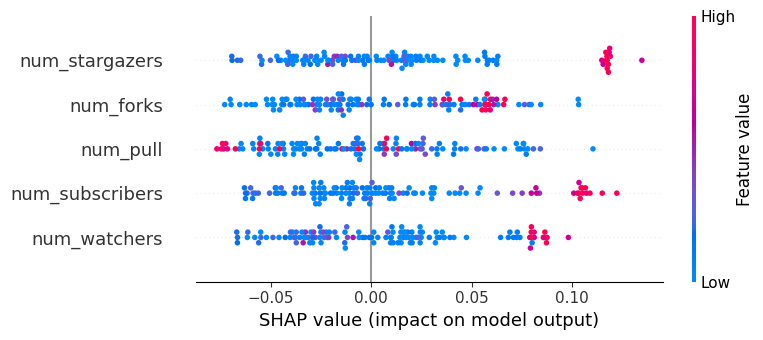

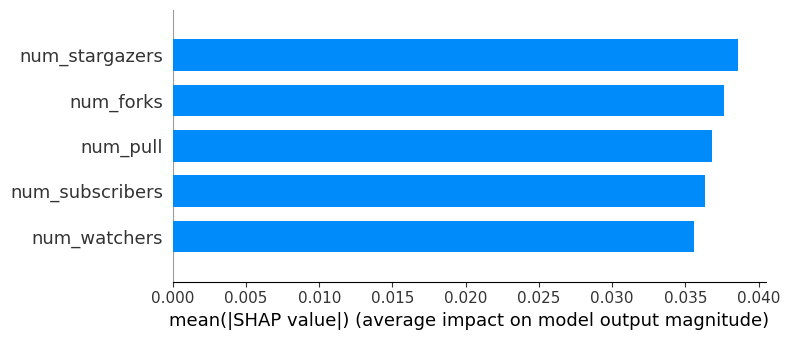

In [66]:
shap.summary_plot(shap_values_tree[:, :, 1], X_test)
shap.summary_plot(shap_values_tree[:, :, 1], X_test, plot_type="bar")

KernelExplainer (Model-Agnostic)

In [62]:
# 2. KernelExplainer (Model-Agnostic)
kernel_explainer = shap.KernelExplainer(model.predict, X_train)  # Use a small sample for efficiency
shap_values_kernel = kernel_explainer.shap_values(X_test)

Using 284 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 122/122 [00:08<00:00, 13.80it/s]


In [63]:
print(shap_values_kernel)

[[ 5.86854460e-03 -1.06807512e-01 -8.97887324e-02 -1.42018779e-01
  -1.03873239e-01]
 [-6.32042254e-02  1.38380282e-01  1.82687793e-01  2.71009390e-01
   3.45070423e-02]
 [ 1.06807512e-01  1.64319249e-01  1.65786385e-01  2.25645540e-01
  -9.91784038e-02]
 [-2.11091549e-01 -6.34976526e-02 -6.20305164e-02 -1.15610329e-02
  -8.84389671e-02]
 [-9.04929577e-02 -3.29812207e-02 -5.61619718e-02  1.47769953e-01
   5.95246479e-01]
 [ 8.35680751e-02  1.41373239e-01  1.00000000e-01  6.83098592e-02
   1.70129108e-01]
 [ 1.84389671e-01  6.26173709e-02 -5.16431925e-03  3.19366197e-01
   2.17136150e-03]
 [-1.59565728e-01 -5.89201878e-02 -3.95539906e-02 -9.85328638e-02
  -8.00469484e-02]
 [-6.90140845e-02  8.97300469e-02  1.49061033e-02  3.86678404e-01
   1.41079812e-01]
 [-2.95774648e-02 -1.12617371e-01 -8.94366197e-02 -1.15258216e-01
  -8.97300469e-02]
 [ 2.41725352e-01  1.66901408e-01 -9.38967136e-04 -1.71713615e-01
   3.27406103e-01]
 [-2.42546948e-01 -2.51173709e-02  1.00938967e-02 -1.37206573e-01

In [64]:
# import os
# import pandas as pd
# import numpy as np
# import json

# # Define directory and file path
# directory = "raw_shap"  # Remove leading "/"
# file_path = f"{directory}/{cate}_{feature}_shap.csv"

# # Ensure the directory exists
# os.makedirs(directory, exist_ok=True)

# # Convert SHAP values to a 2D format
# num_samples, num_features, num_classes = shap_values_kernel.shape  # Get dimensions
# reshaped_values = shap_values_kernel.reshape(num_samples, num_features * num_classes)

# # Create column names dynamically
# columns = [f"Feature_{i}_Class_{j}" for i in range(num_features) for j in range(num_classes)]

# # Convert to DataFrame
# df = pd.DataFrame(reshaped_values, columns=columns)

# # Save to CSV
# df.to_csv(file_path, index=False)

# print(f"SHAP values saved as CSV at {file_path}")

# ########## json ################

# # Convert SHAP values to list
# shap_values_list = shap_values_kernel.tolist()

# # Define directory and file path
# directory = "raw_shap"  # Remove leading "/"
# file_path = f"{directory}/{cate}_{feature}_shap.json"  # JSON extension

# # Ensure the directory exists
# os.makedirs(directory, exist_ok=True)

# # Save to JSON
# with open(file_path, "w") as f:
#     json.dump(shap_values_list, f)

# print(f"SHAP values saved at {file_path}")

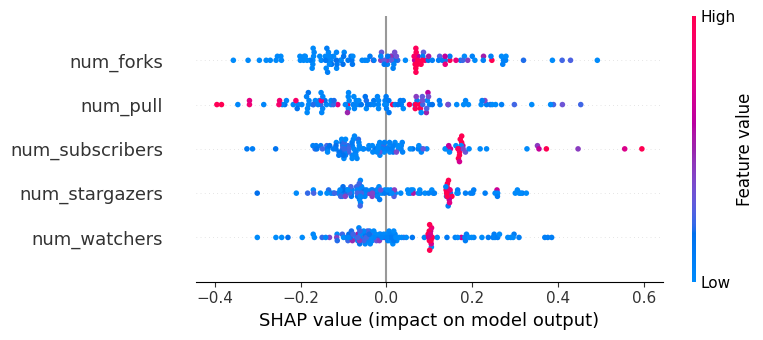

In [65]:
shap.summary_plot(shap_values_kernel, X_test)